<a href="https://colab.research.google.com/github/Jefffish09/MachineLearning/blob/dev/Classification/binary/cnn_binary_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPool1D, Dropout, GlobalMaxPool1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score

In [2]:
seed = 2021
input_dim = 5000
output_dim = 32
max_len = 500
batch_size = 128
epochs = 100
earlystopping_patience = 10

In [3]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=input_dim)
x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

print("x shape is {}, y shape is {}".format(x.shape, y.shape))
print("Classes: {}".format(np.unique(y)))
print("Total words: {}".format(len(np.unique(np.hstack(x)))))


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

x shape is (50000,), y shape is (50000,)
Classes: [0 1]
Total words: 4998


In [4]:
# Preprocess the dataset

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


In [5]:
def plot_perf(history):
  # Create a plot of accuracy and loss over time
  history_dict = history.history
  history_dict.keys()

  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  loss = history_dict["loss"]
  val_loss = history_dict["val_loss"]

  epochs = range(1, len(acc) + 1)

  # Use plot styling from seaborn.
  sns.set(style="darkgrid")
  # Increase the plot size and font size.
  sns.set(font_scale=1.5)
  plt.rcParams["figure.figsize"] = (12, 6)

  # Training and validation loss
  plt.plot(epochs, loss, "r", label="Training loss")
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  # Training and validation accuracy
  plt.plot(epochs, acc, "r", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc="lower right")
  plt.show()

KFold: 1 starts.
Epoch 1/100
176/176 [==============================] - 37s 18ms/step - loss: 0.6609 - accuracy: 0.5553 - val_loss: 0.3675 - val_accuracy: 0.8372
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.2905 - accuracy: 0.8806 - val_loss: 0.2985 - val_accuracy: 0.8740
Epoch 3/100
176/176 [==============================] - 2s 12ms/step - loss: 0.1368 - accuracy: 0.9561 - val_loss: 0.3218 - val_accuracy: 0.8784
Epoch 4/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0638 - accuracy: 0.9812 - val_loss: 0.3988 - val_accuracy: 0.8684
Epoch 5/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0278 - accuracy: 0.9934 - val_loss: 0.4590 - val_accuracy: 0.8756
Epoch 6/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0155 - accuracy: 0.9959 - val_loss: 0.5406 - val_accuracy: 0.8760
Epoch 7/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0133 - accuracy: 0.9958 - val_loss: 0.57

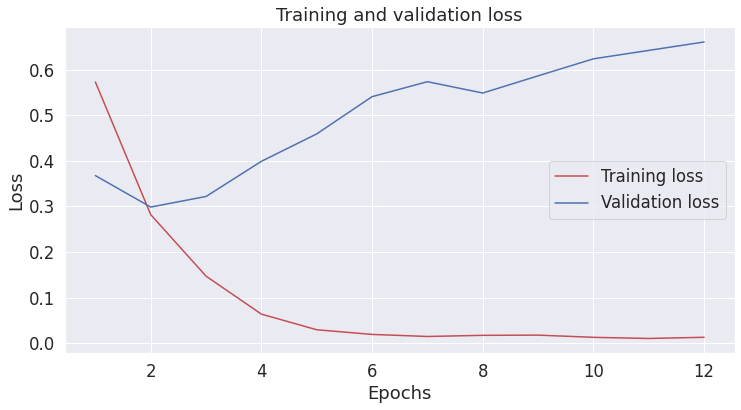

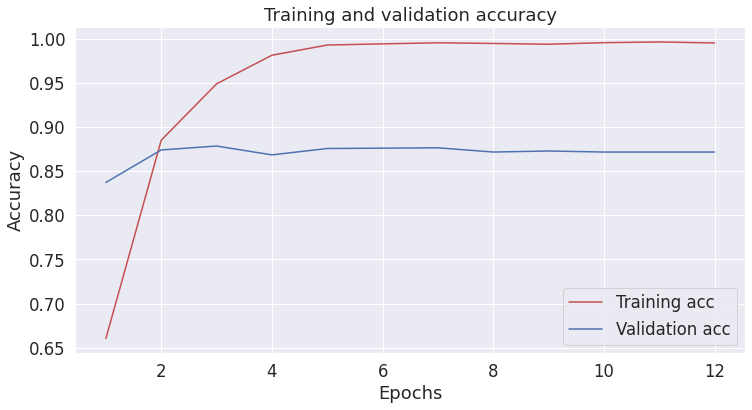

              precision    recall  f1-score   support

           0      0.851     0.907     0.878     12500
           1      0.900     0.841     0.870     12500

    accuracy                          0.874     25000
   macro avg      0.876     0.874     0.874     25000
weighted avg      0.876     0.874     0.874     25000


KFold: 2 starts.
Epoch 1/100
176/176 [==============================] - 3s 14ms/step - loss: 0.6458 - accuracy: 0.5678 - val_loss: 0.3476 - val_accuracy: 0.8452
Epoch 2/100
176/176 [==============================] - 2s 12ms/step - loss: 0.2696 - accuracy: 0.8914 - val_loss: 0.3054 - val_accuracy: 0.8672
Epoch 3/100
176/176 [==============================] - 2s 13ms/step - loss: 0.1289 - accuracy: 0.9594 - val_loss: 0.3231 - val_accuracy: 0.8748
Epoch 4/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0564 - accuracy: 0.9853 - val_loss: 0.4288 - val_accuracy: 0.8684
Epoch 5/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0

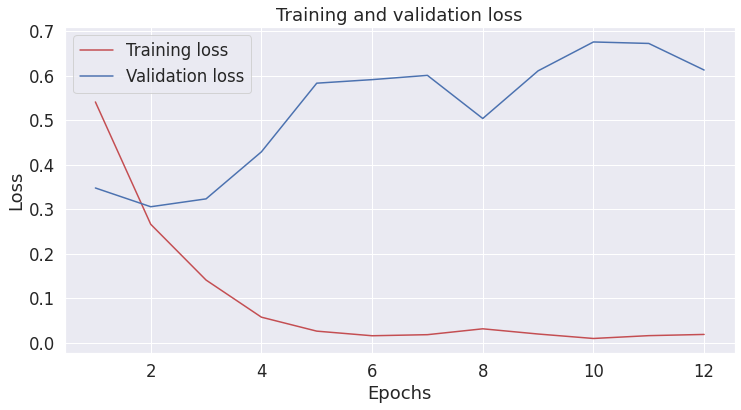

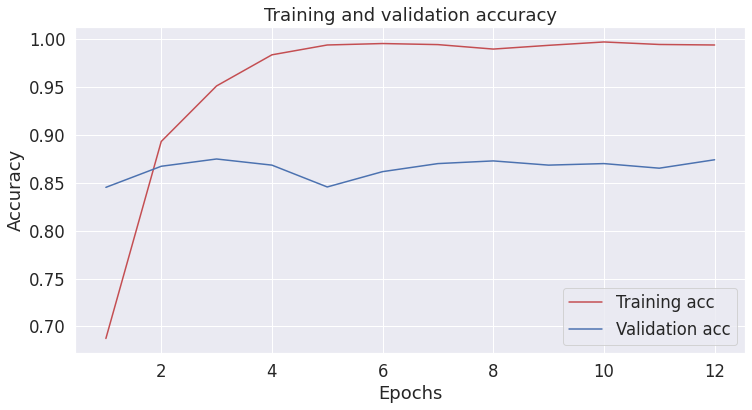

              precision    recall  f1-score   support

           0      0.852     0.909     0.880     12500
           1      0.902     0.842     0.871     12500

    accuracy                          0.876     25000
   macro avg      0.877     0.876     0.875     25000
weighted avg      0.877     0.876     0.875     25000


KFold: 3 starts.
Epoch 1/100
176/176 [==============================] - 3s 15ms/step - loss: 0.6525 - accuracy: 0.5607 - val_loss: 0.3408 - val_accuracy: 0.8448
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.2780 - accuracy: 0.8878 - val_loss: 0.2850 - val_accuracy: 0.8832
Epoch 3/100
176/176 [==============================] - 2s 13ms/step - loss: 0.1316 - accuracy: 0.9555 - val_loss: 0.3211 - val_accuracy: 0.8748
Epoch 4/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0558 - accuracy: 0.9850 - val_loss: 0.4352 - val_accuracy: 0.8704
Epoch 5/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0

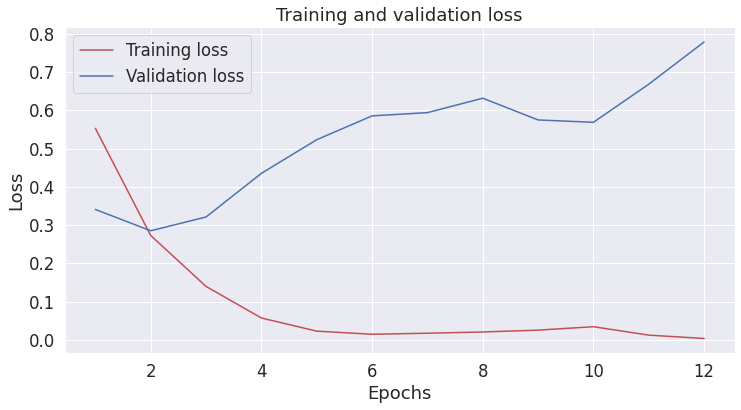

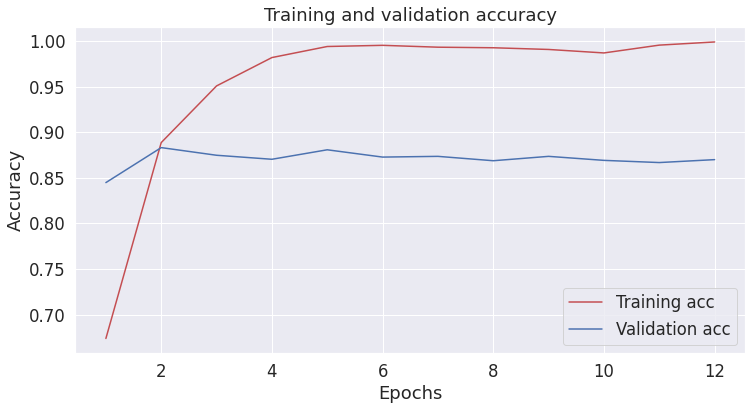

              precision    recall  f1-score   support

           0      0.872     0.883     0.878     12500
           1      0.882     0.870     0.876     12500

    accuracy                          0.877     25000
   macro avg      0.877     0.877     0.877     25000
weighted avg      0.877     0.877     0.877     25000


KFold: 4 starts.
Epoch 1/100
176/176 [==============================] - 3s 14ms/step - loss: 0.6471 - accuracy: 0.5748 - val_loss: 0.3388 - val_accuracy: 0.8528
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.2745 - accuracy: 0.8913 - val_loss: 0.3378 - val_accuracy: 0.8616
Epoch 3/100
176/176 [==============================] - 2s 13ms/step - loss: 0.1485 - accuracy: 0.9485 - val_loss: 0.3810 - val_accuracy: 0.8548
Epoch 4/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0609 - accuracy: 0.9837 - val_loss: 0.4330 - val_accuracy: 0.8680
Epoch 5/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0

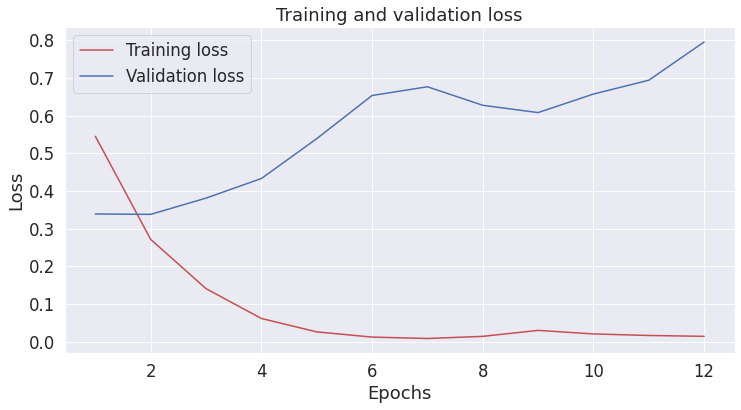

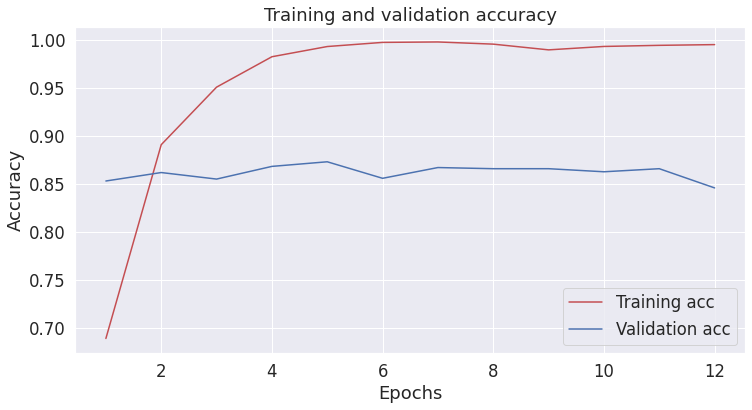

              precision    recall  f1-score   support

           0      0.925     0.790     0.852     12500
           1      0.817     0.936     0.872     12500

    accuracy                          0.863     25000
   macro avg      0.871     0.863     0.862     25000
weighted avg      0.871     0.863     0.862     25000


KFold: 5 starts.
Epoch 1/100
176/176 [==============================] - 3s 14ms/step - loss: 0.6592 - accuracy: 0.5633 - val_loss: 0.3576 - val_accuracy: 0.8420
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.2803 - accuracy: 0.8835 - val_loss: 0.2889 - val_accuracy: 0.8792
Epoch 3/100
176/176 [==============================] - 2s 13ms/step - loss: 0.1309 - accuracy: 0.9570 - val_loss: 0.3299 - val_accuracy: 0.8696
Epoch 4/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0557 - accuracy: 0.9851 - val_loss: 0.4270 - val_accuracy: 0.8732
Epoch 5/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0

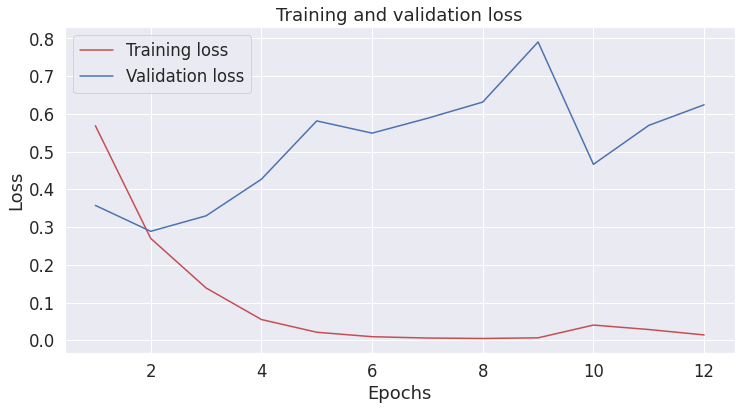

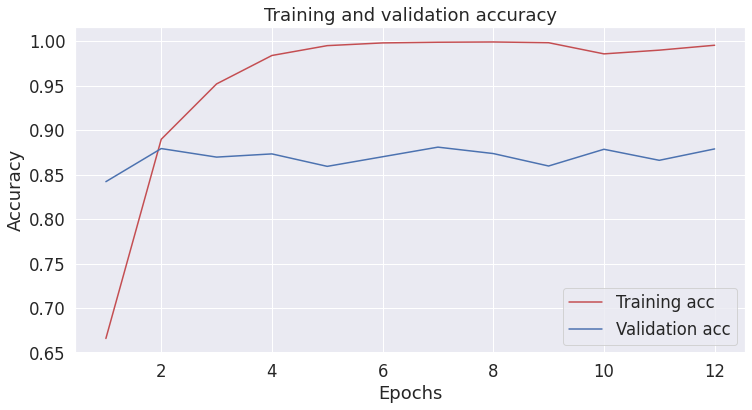

              precision    recall  f1-score   support

           0      0.879     0.879     0.879     12500
           1      0.879     0.879     0.879     12500

    accuracy                          0.879     25000
   macro avg      0.879     0.879     0.879     25000
weighted avg      0.879     0.879     0.879     25000


KFold: 6 starts.
Epoch 1/100
176/176 [==============================] - 3s 14ms/step - loss: 0.6609 - accuracy: 0.5540 - val_loss: 0.3621 - val_accuracy: 0.8372
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.2892 - accuracy: 0.8829 - val_loss: 0.2852 - val_accuracy: 0.8780
Epoch 3/100
176/176 [==============================] - 2s 14ms/step - loss: 0.1366 - accuracy: 0.9540 - val_loss: 0.3489 - val_accuracy: 0.8664
Epoch 4/100
176/176 [==============================] - 2s 14ms/step - loss: 0.0566 - accuracy: 0.9845 - val_loss: 0.3913 - val_accuracy: 0.8704
Epoch 5/100
176/176 [==============================] - 2s 14ms/step - loss: 0.0

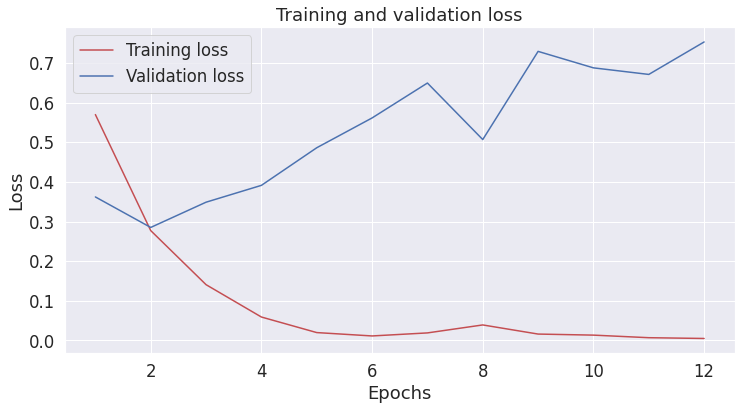

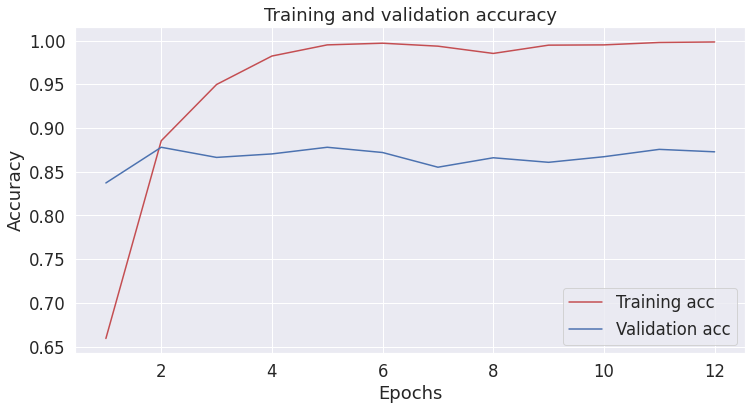

              precision    recall  f1-score   support

           0      0.888     0.859     0.873     12500
           1      0.863     0.892     0.877     12500

    accuracy                          0.875     25000
   macro avg      0.876     0.875     0.875     25000
weighted avg      0.876     0.875     0.875     25000


KFold: 7 starts.
Epoch 1/100
176/176 [==============================] - 3s 15ms/step - loss: 0.6384 - accuracy: 0.5902 - val_loss: 0.3794 - val_accuracy: 0.8328
Epoch 2/100
176/176 [==============================] - 2s 14ms/step - loss: 0.2949 - accuracy: 0.8783 - val_loss: 0.3012 - val_accuracy: 0.8816
Epoch 3/100
176/176 [==============================] - 2s 14ms/step - loss: 0.1417 - accuracy: 0.9522 - val_loss: 0.3423 - val_accuracy: 0.8752
Epoch 4/100
176/176 [==============================] - 2s 14ms/step - loss: 0.0596 - accuracy: 0.9843 - val_loss: 0.4130 - val_accuracy: 0.8772
Epoch 5/100
176/176 [==============================] - 2s 14ms/step - loss: 0.0

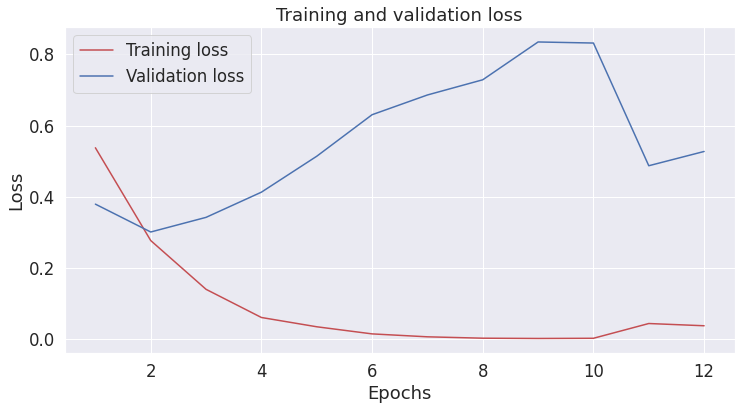

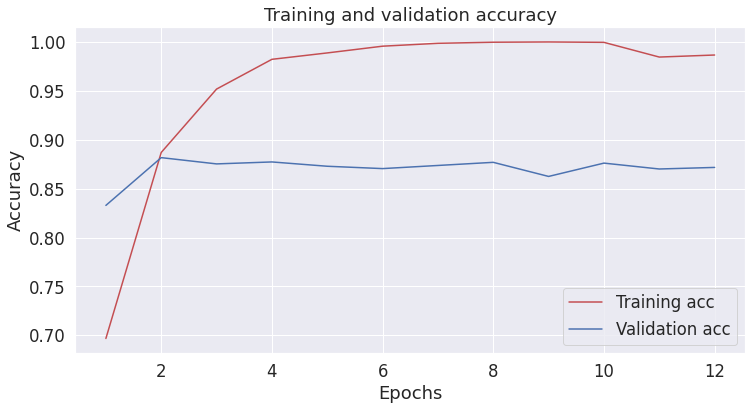

              precision    recall  f1-score   support

           0      0.885     0.862     0.873     12500
           1      0.865     0.888     0.876     12500

    accuracy                          0.875     25000
   macro avg      0.875     0.875     0.875     25000
weighted avg      0.875     0.875     0.875     25000


KFold: 8 starts.
Epoch 1/100
176/176 [==============================] - 3s 15ms/step - loss: 0.6672 - accuracy: 0.5544 - val_loss: 0.3654 - val_accuracy: 0.8408
Epoch 2/100
176/176 [==============================] - 3s 14ms/step - loss: 0.2959 - accuracy: 0.8782 - val_loss: 0.2979 - val_accuracy: 0.8740
Epoch 3/100
176/176 [==============================] - 2s 14ms/step - loss: 0.1491 - accuracy: 0.9475 - val_loss: 0.3258 - val_accuracy: 0.8708
Epoch 4/100
176/176 [==============================] - 2s 14ms/step - loss: 0.0664 - accuracy: 0.9806 - val_loss: 0.3959 - val_accuracy: 0.8692
Epoch 5/100
176/176 [==============================] - 2s 14ms/step - loss: 0.0

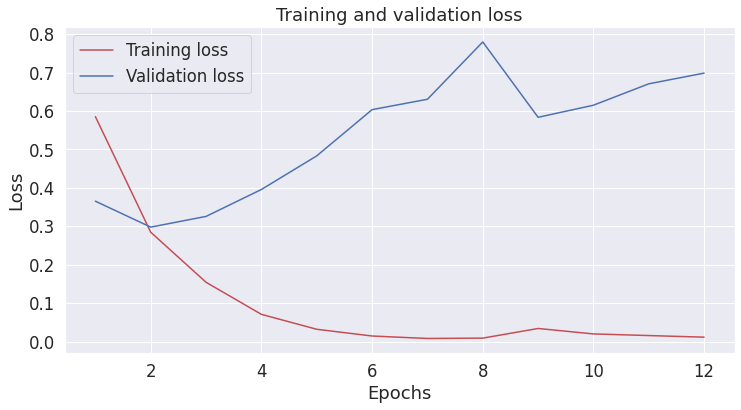

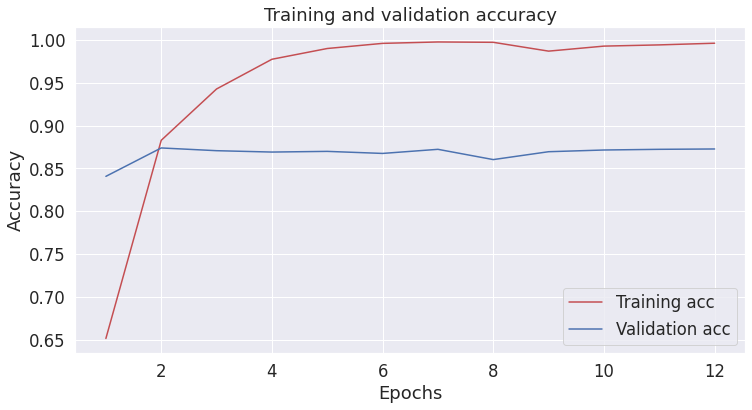

              precision    recall  f1-score   support

           0      0.875     0.881     0.878     12500
           1      0.880     0.874     0.877     12500

    accuracy                          0.877     25000
   macro avg      0.877     0.877     0.877     25000
weighted avg      0.877     0.877     0.877     25000


KFold: 9 starts.
Epoch 1/100
176/176 [==============================] - 3s 15ms/step - loss: 0.6502 - accuracy: 0.5733 - val_loss: 0.3550 - val_accuracy: 0.8480
Epoch 2/100
176/176 [==============================] - 2s 14ms/step - loss: 0.2818 - accuracy: 0.8856 - val_loss: 0.2964 - val_accuracy: 0.8796
Epoch 3/100
176/176 [==============================] - 2s 14ms/step - loss: 0.1327 - accuracy: 0.9571 - val_loss: 0.3136 - val_accuracy: 0.8772
Epoch 4/100
176/176 [==============================] - 2s 14ms/step - loss: 0.0562 - accuracy: 0.9853 - val_loss: 0.3743 - val_accuracy: 0.8796
Epoch 5/100
176/176 [==============================] - 3s 14ms/step - loss: 0.0

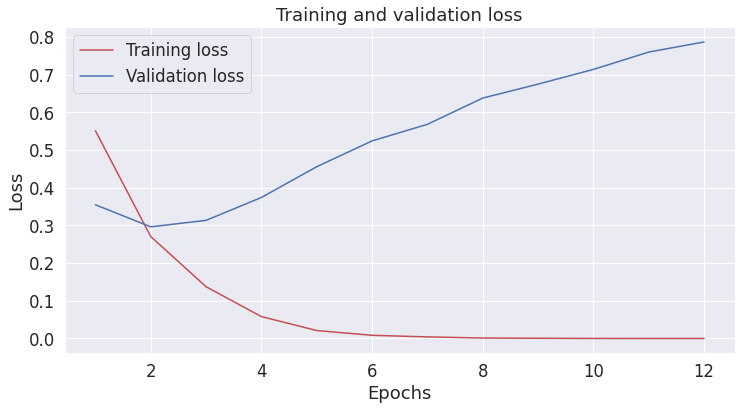

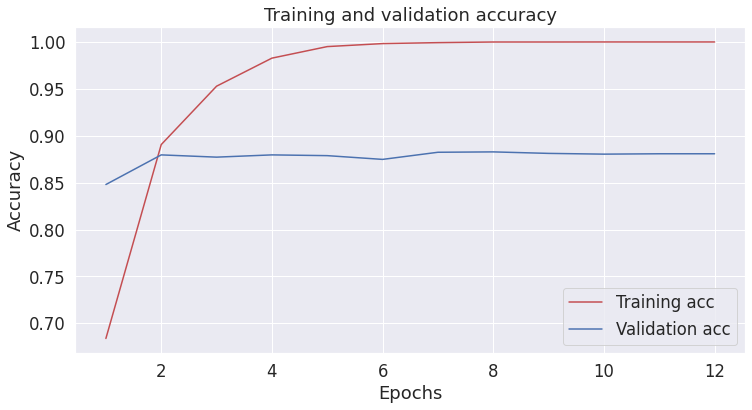

              precision    recall  f1-score   support

           0      0.914     0.824     0.867     12500
           1      0.840     0.922     0.879     12500

    accuracy                          0.873     25000
   macro avg      0.877     0.873     0.873     25000
weighted avg      0.877     0.873     0.873     25000


KFold: 10 starts.
Epoch 1/100
176/176 [==============================] - 3s 16ms/step - loss: 0.6596 - accuracy: 0.5596 - val_loss: 0.3810 - val_accuracy: 0.8400
Epoch 2/100
176/176 [==============================] - 3s 14ms/step - loss: 0.3115 - accuracy: 0.8671 - val_loss: 0.3050 - val_accuracy: 0.8740
Epoch 3/100
176/176 [==============================] - 2s 14ms/step - loss: 0.1570 - accuracy: 0.9464 - val_loss: 0.3321 - val_accuracy: 0.8676
Epoch 4/100
176/176 [==============================] - 2s 14ms/step - loss: 0.0723 - accuracy: 0.9810 - val_loss: 0.3757 - val_accuracy: 0.8760
Epoch 5/100
176/176 [==============================] - 2s 14ms/step - loss: 0.

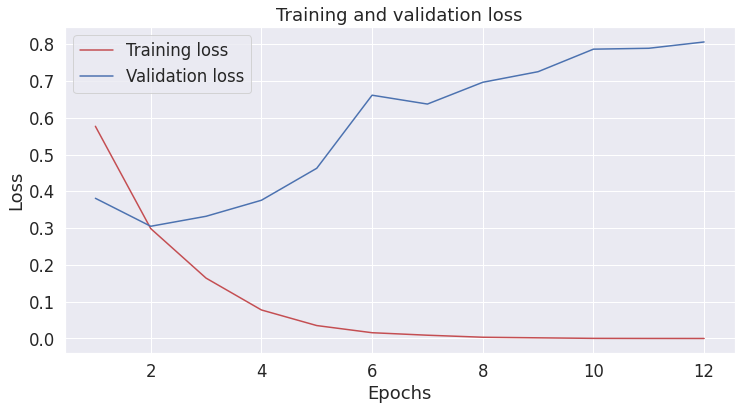

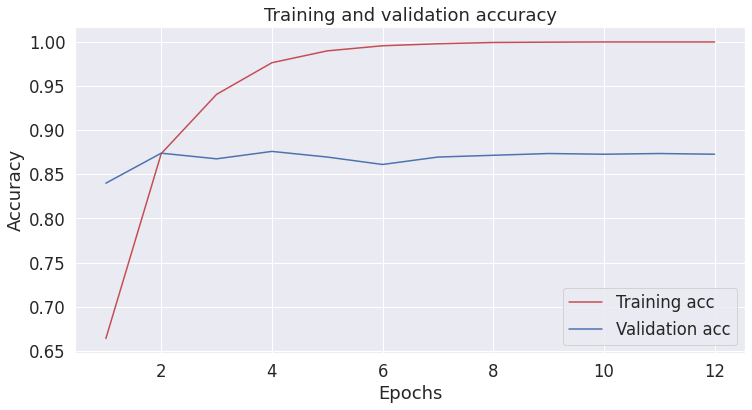

              precision    recall  f1-score   support

           0      0.862     0.877     0.870     12500
           1      0.875     0.859     0.867     12500

    accuracy                          0.868     25000
   macro avg      0.868     0.868     0.868     25000
weighted avg      0.868     0.868     0.868     25000


Average accuracy: 0.8737 (+/- 0.0045)
Average loss: 0.2997 (+/- 0.0107)
Average F1: 0.8745 (+/- 0.0039)


In [6]:
# Create and train the model

earlystop_callback = EarlyStopping(
  monitor="val_loss",
  min_delta=0.0001,
  patience=earlystopping_patience,
  restore_best_weights=True)

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
model = None
cv_acc = []
cv_loss = []
cv_f1 = []

for n, (train, valid) in enumerate(kfold.split(x_train, y_train)):

  print("KFold: {} starts.".format(n + 1))
  del model
  tf.keras.backend.clear_session()
  
  model = Sequential([
    Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_len),
    Conv1D(filters=32, kernel_size=3, padding="same", activation="relu"),
    MaxPool1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, padding="same", activation="relu"),
    GlobalMaxPool1D(),
    Flatten(),
    # Hidden layers
    Dense(units=250, activation="relu"),
    Dropout(rate=0.2, noise_shape=None, seed=None),
    Dense(units=250, activation="relu"),
    Dropout(rate=0.2, noise_shape=None, seed=None),
    # Output layer
    Dense(units=1, activation="sigmoid")
  ])

  model.compile(
      loss="binary_crossentropy",
      optimizer="adam",
      metrics=["accuracy"]
  )

  # model.summary()

  history = model.fit(
      x=x_train[train],
      y=y_train[train],
      validation_data=(x_train[valid], y_train[valid]),
      batch_size=batch_size,
      epochs=epochs,
      verbose=1,
      callbacks=[earlystop_callback]
  )

  loss, acc = model.evaluate(x=x_test, y=y_test, verbose=1)
  cv_acc.append(acc)
  cv_loss.append(loss)

  plot_perf(history)

  # np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
  # (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).
  y_pred = (model.predict(x_test) > 0.5).astype("int32")
  report = classification_report(y_true=y_test, y_pred=y_pred, digits=3, output_dict=False)
  print(report)

  f1 = f1_score(y_true=y_test, y_pred=y_pred, average="binary")
  cv_f1.append(f1)

  print("")

print("Average accuracy: {:.4f} (+/- {:.4f})".format(np.mean(cv_acc), np.std(cv_acc)))
print("Average loss: {:.4f} (+/- {:.4f})".format(np.mean(cv_loss), np.std(cv_loss)))
print("Average F1: {:.4f} (+/- {:.4f})".format(np.mean(cv_f1), np.std(cv_f1)))
